# **Puntuación del comportamiento en relación al uso de tarjeta de crédito.**

**Objetivo**: Crear un modelo de behaviour scoring para pronosticar la probabilidad de que los clientes dejen de pagar sus tarjetas de crédito en el futuro.

- **Información sobre los datos del archivo: 'Dev_data_to_be_shared.csv':**
 - Trata de una instantánea histórica de la cartera de tarjetas de crédito del Banco A. Las tarjetas de crédito que han incumplido realmente tienen bad_flag = 1.
 - Se han proporcionado variables independientes. Entre ellas se incluyen:
   - Atributos onus como el **límite de crédito** (variables con nombres que empiezan por onus_attributes)

   - Atributos de **nivel de transacción como número de transacciones** / transacciones de valor en rupias en varios tipos de comerciantes (variables con nombres que empiezan por transaction_attribute)

   - Atributos de **nivel de línea comercial de oficina** (como tenencias de productos, morosidad histórica) - variables que empiezan por bureau

   - Atributos a **nivel de consulta de oficina** (como consultas PL en los últimos 3 meses, etc.): variables que empiezan por bureau_enquiry.

- **Información sobre los datos del archivo: 'Validation_data_to_be_shared.csv':**
Cuenta con el mismo conjunto de variables de entrada, pero sin «bad_flag». A partir de ahora, estos datos se denominarán «datos de validación».

##**Importar librerías**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## **Carga de archivo y análisis de datos exploratorio**

In [33]:
df_dev = pd.read_csv('Dev_data_to_be_shared.csv')
df_val = pd.read_csv('validation_data_to_be_shared.csv')

In [34]:
df_dev.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_val.head()

,account_number,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,100001,34000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100003,130000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
3,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,53000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_dev.describe()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
count,96806.000000,96806.000000,7.157500e+04,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,...,94212.0,94212.000000,94212.000000,94212.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,48403.500000,0.014173,1.542391e+05,9.570769,0.002207,4.092854,77.306435,0.006315,67.043550,0.081034,...,0.0,0.189657,0.044283,7.800673,0.588114,1.497158,0.545650,1.430491,0.121447,0.119208
std,27945.629417,0.118203,1.729925e+05,1513.967595,0.119240,301.580599,3164.987013,0.129545,2516.330899,14.203615,...,0.0,0.597298,0.369451,8.655149,1.059613,1.702795,1.055865,1.728950,0.601256,0.599697
min,1.000000,0.000000,2.500000e+04,0.000000,0.000000,0.000000,-109800.476600,0.000000,-3498.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24202.250000,0.000000,5.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,48403.500000,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,72604.750000,0.000000,1.810000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,11.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
max,96806.000000,1.000000,2.800000e+06,398936.791000,25.000000,55000.000000,358986.000000,12.000000,358986.000000,3150.000000,...,0.0,18.000000,14.000000,102.000000,19.000000,38.000000,19.000000,38.000000,15.000000,15.000000


In [37]:
df_dev.isnull().sum()

,0
account_number,0
bad_flag,0
onus_attribute_1,25231
transaction_attribute_1,25231
transaction_attribute_2,25231
...,...
onus_attribute_44,85196
onus_attribute_45,85196
onus_attribute_46,85196
onus_attribute_47,85196


In [38]:
df_dev.duplicated().sum()

0

##**Visualización de distribución de variable objetivo**

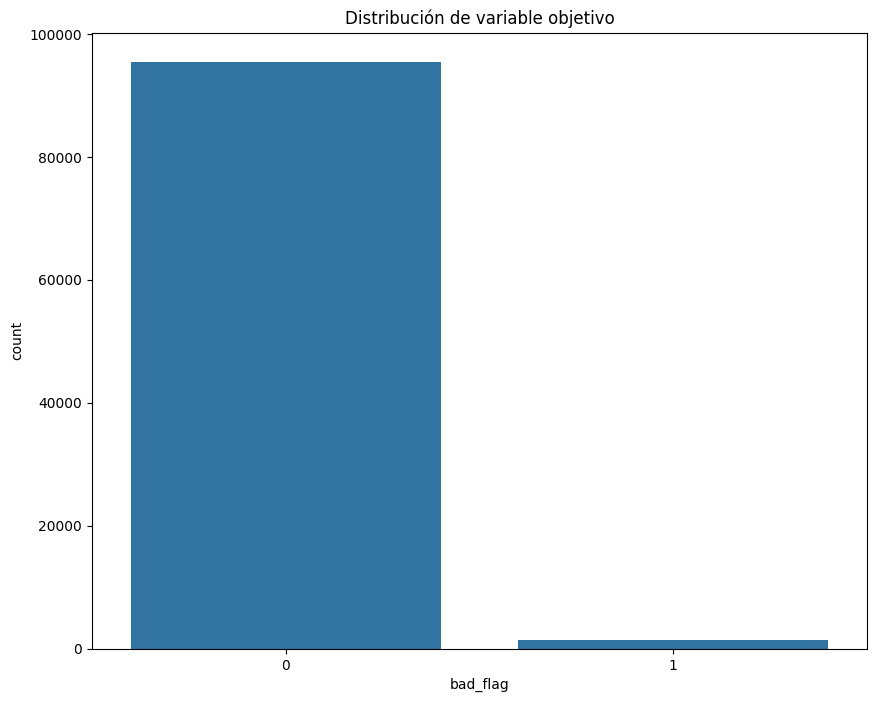


 Distribución de variable objetivo (%): 
bad_flag
0    98.6
1     1.4
Name: proportion, dtype: float64


In [39]:
plt.figure(figsize=(10, 8))
sns.countplot(x='bad_flag', data=df_dev)
plt.title('Distribución de variable objetivo')
plt.show()

print("\n Distribución de variable objetivo (%): ")
print(df_dev['bad_flag'].value_counts(normalize=True).round(3) * 100)

##**Manejo de valores nulos**

In [40]:
def manejo_valores_nulos(df):

  # Cálculo de porcentajes de valores nulos
  porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

  # Elimina columnas que superen el 70% de valores nulos
  columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > 70].index
  df_cleaned = df.drop(columns=columnas_a_eliminar)

  # Imputación de valores nulos con mediana
  columnas_numericas = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
  df_cleaned[columnas_numericas] = df_cleaned[columnas_numericas].fillna(df_cleaned[columnas_numericas].median())
  return df_cleaned

# Limpia ambas datasets
df_dev_cleaned = manejo_valores_nulos(df_dev)
df_val_cleaned = manejo_valores_nulos(df_val)

## **Heatmap de correlación**

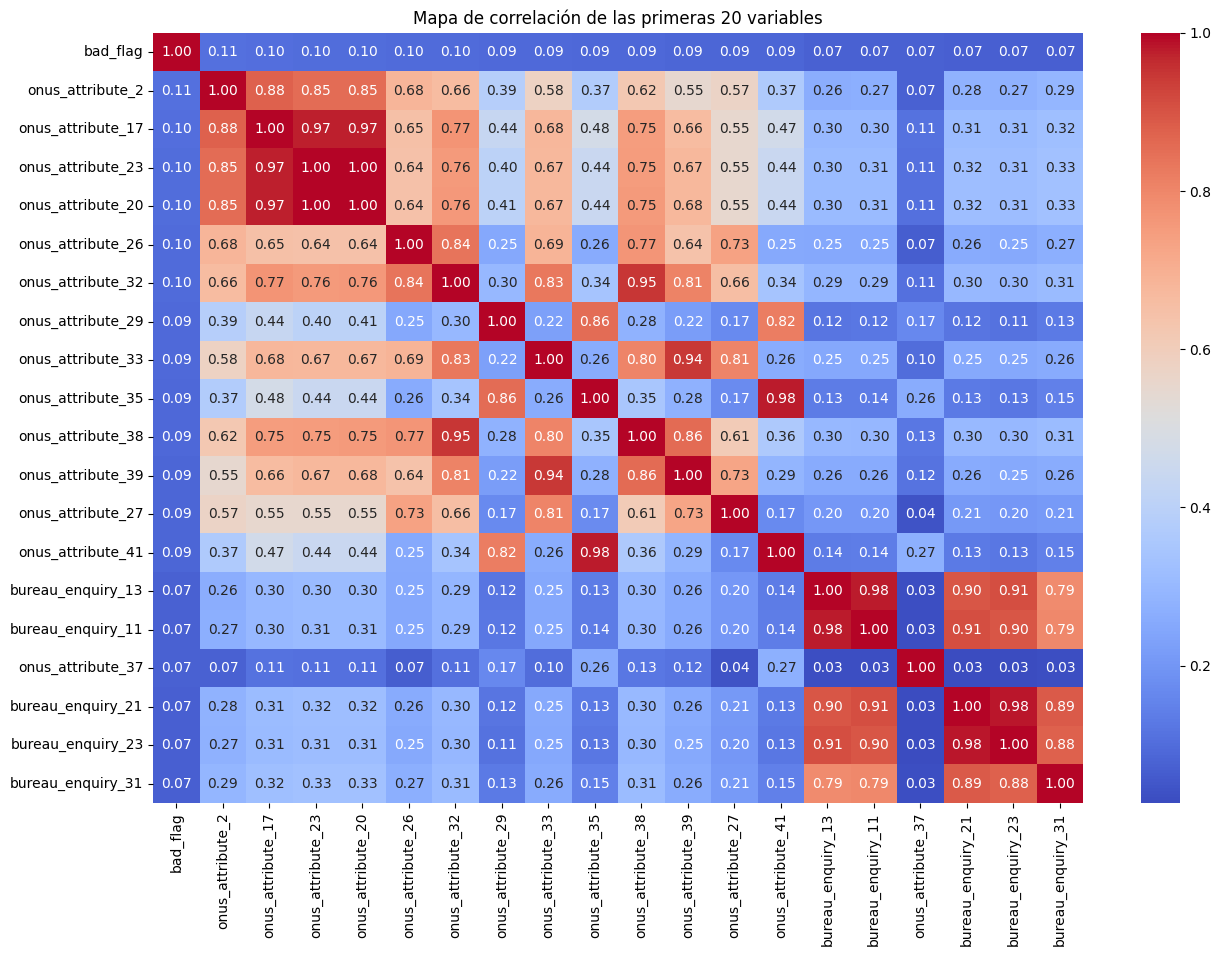

In [41]:
target_corr = df_dev_cleaned.corr()['bad_flag']
top_features = target_corr.abs().sort_values(ascending=False)[:20].index
primeras_veinte_corr = df_dev_cleaned[top_features].corr()

# Plot mapa de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(primeras_veinte_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlación de las primeras 20 variables')
plt.show()

## **Preparación y modelamiento de datos**

> En esta oportunidad, se ha visualizado que la variable objetivo tiene una distribución desequilibrada; es decir, hay muchos más deudores no morosos que morosos. Por lo que, el uso de la estratificación es crucial para garantizar la representatividad de los conjuntos de entrenamiento y prueba. Caso contrario, se podría obtener un conjunto de prueba con una proporción muy diferente de morosos en comparación con el conjunto de datos general, dando lugar a una evaluación inexacta del rendimiento del modelo.

In [42]:
# Determinación de las variables explicativas (X) y variable objetivo (Y)
X = df_dev_cleaned.drop(['bad_flag','account_number'], axis=1)
Y = df_dev_cleaned['bad_flag']

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Normalización de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Manejo de desbalance de datos**

> Se aplicará la técnica **oversampling** SMOTE que consta en aumentar la clase minoritaria creando nuevas instancias sintéticas interpolando entre muestras existentes de la clase minoritaria.


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [44]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_smote_balanced, Y_train_smote_balanced = smote.fit_resample(X_train_scaled, Y_train)

## **Modelado con algoritmos de clasificación: Regresión logística, bosque aleatorio y XGBoost**

In [46]:
modelos =  {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter= 1000, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight = 98.6/1.4, max_depth = 6, learning_rate= 0.1, random_state=42)
}

# Entrenamiento de modelos
resultados = {}
for nombre, modelo in modelos.items():
  print(f"Entrenando modelo: {nombre}")
  modelo.fit(X_train_smote_balanced, Y_train_smote_balanced)
  Y_pred = modelo.predict(X_test_scaled)
  Y_pred_prob = modelo.predict_proba(X_test_scaled)[:, 1]
  resultados[nombre] = {
      'predicciones': Y_pred,
      'probabilidades': Y_pred_prob
  }

Entrenando modelo: Logistic Regression
Entrenando modelo: Random Forest
Entrenando modelo: XGBoost


## **Evaluación de modelos**


### **Representación gráfica del rendimiento de los modelos de clasificación binaria: Receiver Operating Characteristic (ROC Curves)**

> **Ejes:**
- **Eje X**: Tasa de Falsos Positivos (FPR) = FP/(FP + TN)

**(Proporción de negativos reales incorrectamente clasificados como positivos).**

> - **Eje Y**: Tasa de Verdaderos Positivos (TPR o Sensibilidad) = TP/(TP + FN)

**(Proporción de positivos reales correctamente identificados).**

- **Propósito:** Visualizar el trade-off entre la capacidad de detectar positivos (sensibilidad) y los errores de falsas alarmas (1 - especificidad) para diferentes umbrales de clasificación.


> **Interpretación**

- **Curva cercana a la esquina superior izquierda**: Modelo excelente (alta TPR, bajo FPR).

- **Diagonal (AUC=0.5)**: Clasificador aleatorio (no discrimina entre clases).

- **Área bajo la curva (AUC-ROC)**: Valor entre 0 y 1 que cuantifica la calidad global del modelo:

 > - AUC = 1: Clasificador perfecto.
 > - AUC = 0.5: Equivalente a adivinar al azar.


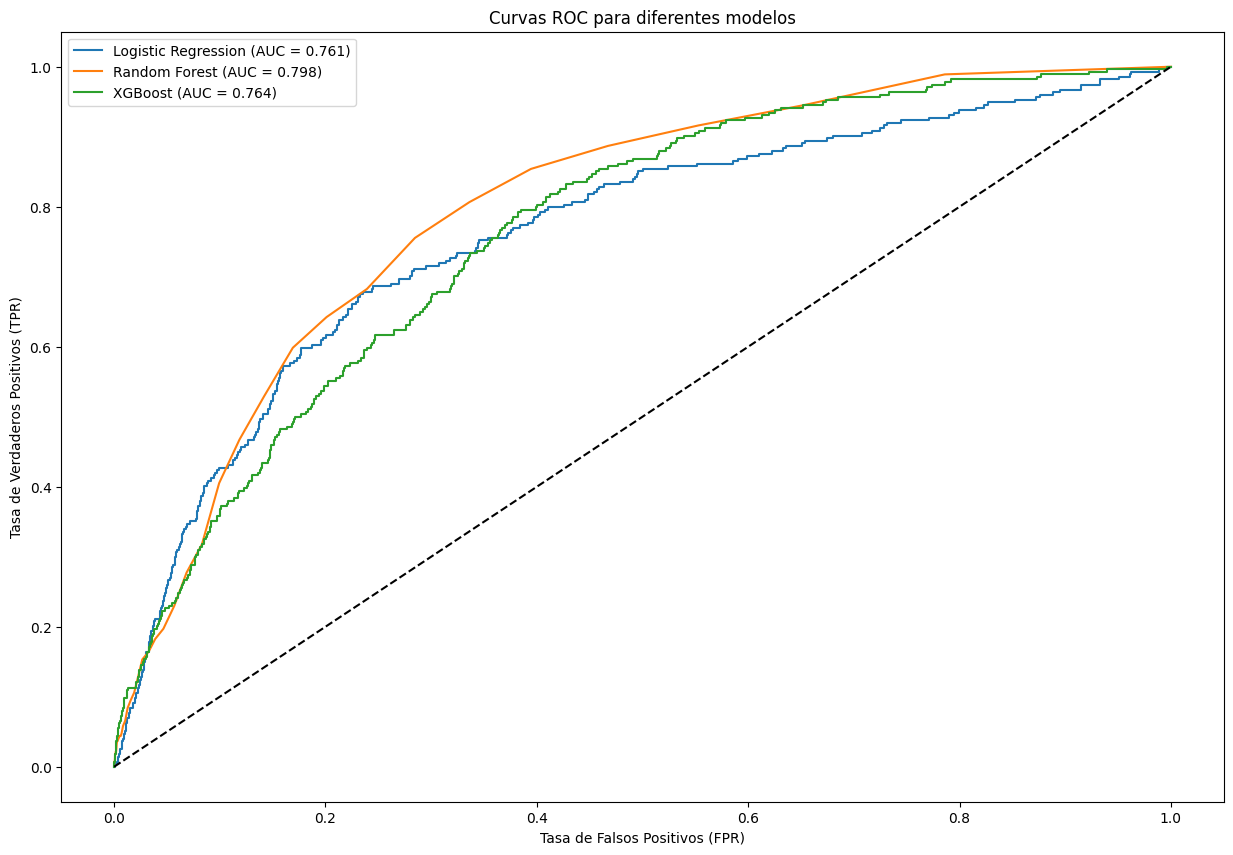


Logistic Regression Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     19088
           1       0.04      0.62      0.08       274

    accuracy                           0.79     19362
   macro avg       0.52      0.71      0.48     19362
weighted avg       0.98      0.79      0.87     19362


Random Forest Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19088
           1       0.40      0.01      0.01       274

    accuracy                           0.99     19362
   macro avg       0.69      0.50      0.50     19362
weighted avg       0.98      0.99      0.98     19362


XGBoost Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     19088
           1       0.04      0.46      0.08       274

    accuracy                           0.85     19362
   ma

In [47]:
# Plot Receiver Operating Characteristic Curves
plt.figure(figsize=(15, 10))
for nombre, resultado, in resultados.items():
  fpr, tpr, _ = roc_curve(Y_test, resultado['probabilidades'])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'{nombre} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para diferentes modelos')
plt.legend()
plt.show()

# Mostrar reportes de clasificación
for nombre, resultado in resultados.items():
  print(f"\n{nombre} Reporte de clasificación:")
  print(classification_report(Y_test, resultado['predicciones']))

# **Análisis de resultados**

## **Curvas ROC**

La gráfica de curvas ROC registra superior al modelo Random Forest con un AUC de 0.798, seguido de XGBoost (0.764) y Regresión Logística (0.761). Estas curvas muestran:

 - **Random Forest (naranja)**: Aparentemente, supera a los otros modelos en la mayor parte del espacio ROC, indicando "mejor" capacidad para discriminar entre clases a diferentes umbrales de decisión.

 - **XGBoost (verde)**: Muestra un rendimiento competitivo en algunas regiones de la curva, particularmente en tasas bajas de falsos positivos.

- **Regresión Logística (azul)**: Aunque tiene el AUC más bajo, en algunas regiones específicas de la curva muestra un rendimiento competitivo.

## **Modelos de clasificación**
> **Regresión Logística**
  - Precisión general: 0.79
  - AUC: 0.761
  - **Fortalezas:** Alta precisión (0.99) para la clase mayoritaria (0)
  - **Debilidades:** Bajo rendimiento en la clase minoritaria (1) con un recall de 0.62 y un f1-score de 0.08
 - La regresión logística está clasificando correctamente la mayoría de las muestras de la clase 0, pero tiene dificultades significativas para identificar las muestras de la clase 1, lo que es problemático para modelar la probabilidad de impago de las tarjetas de crédito (riesgo crediticio).

> **Random Forest**
 - Precisión general: 0.99
 - AUC: 0.798 (el más alto)
 - **Fortalezas:** Excelente recall (1.00) para la clase mayoritaria y mejor f1-score ponderado (0.98)
 - **Debilidades:** Baja precisión (0.40) para la clase minoritaria.
  - Random Forest muestra un rendimiento sobresaliente en términos de recall para la clase de no morosos (0). Sin embargo, tiene mínima precisión para la clase minoritaria, debido al fuerte desbalance de clases. Por lo tanto, se debe priorizar el análisis de recall, f1-score y AUC por sobre la precisión general.

> **XGBoost**
- Precisión general: 0.85
- AUC: 0.764
- **Fortalezas:** Buen equilibrio general entre precisión y recall
- **Debilidades:** Rendimiento moderado en la clase minoritaria (recall de 0.46)
 - XGBoost ofrece un rendimiento intermedio entre los otros dos modelos (considerando AUC y recall de morosos (1)), con una precisión general sólida, lo cual lo cataloga como un **modelo adecuado**, a pesar de no diferenciarse con el modelo de regresión logística en la detección de la clase minoritaria.